In [2]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [3]:
df=pd.read_csv("final_data_in_ML.csv",parse_dates=['Standardized_Date'])

In [4]:
df

,Standardized_Date,STANDARDIZED_TIME,RAW WATER FLOW IN ML,CLEAR WATER SUMP LEVEL IN Meter,CLEAR WATER PUMPING FLOW ML,TREATED WATER PRODUCTION IN ML,REMARKS,remarks category
0,2021-12-01,00:00:00,3.52301,2.10,2.70209,3.40957,No remarks,No remarks
1,2021-12-01,01:00:00,3.51043,2.84,2.77743,3.39739,No remarks,No remarks
2,2021-12-01,02:00:00,3.49087,3.12,2.79467,3.37846,No remarks,No remarks
3,2021-12-01,03:00:00,3.50543,3.44,2.79543,3.39256,No remarks,No remarks
4,2021-12-01,04:00:00,3.51556,3.72,2.79826,3.40236,No remarks,No remarks
...,...,...,...,...,...,...,...,...
24043,2024-08-28,19:00:00,3.13486,3.46,2.87175,3.03392,No remarks,No remarks
24044,2024-08-28,20:00:00,3.17401,3.63,2.85830,3.07181,No remarks,No remarks
24045,2024-08-28,21:00:00,3.13113,3.64,2.87098,3.03031,No remarks,No remarks
24046,2024-08-28,22:00:00,3.16261,3.49,2.89001,3.06077,No remarks,No remarks


In [5]:
df.isnull().sum()

Standardized_Date                  0
STANDARDIZED_TIME                  0
RAW WATER FLOW IN ML               0
CLEAR WATER SUMP LEVEL IN Meter    0
CLEAR WATER PUMPING FLOW ML        0
TREATED WATER PRODUCTION IN ML     0
REMARKS                            0
remarks category                   0
dtype: int64

In [6]:
df.dtypes

Standardized_Date                  datetime64[ns]
STANDARDIZED_TIME                          object
RAW WATER FLOW IN ML                      float64
CLEAR WATER SUMP LEVEL IN Meter           float64
CLEAR WATER PUMPING FLOW ML               float64
TREATED WATER PRODUCTION IN ML            float64
REMARKS                                    object
remarks category                           object
dtype: object

In [7]:
df['Standardized_Date'].value_counts()

Standardized_Date
2021-12-01    24
2023-10-04    24
2023-09-21    24
2023-09-22    24
2023-09-23    24
              ..
2022-11-05    24
2022-11-06    24
2022-11-07    24
2022-11-08    24
2024-08-28    24
Name: count, Length: 1002, dtype: int64

In [8]:
df['remarks category'].unique()

array(['No remarks', 'WTP cleaning', 'energy auditing',
       'Power Failure at Intake', 'Power Failure at WTP',
       'maintanance at intake', 'Power Failure at intake and WTP',
       'maintanance at Thaliparamba', 'pipe line broken at thaliparamba',
       'intake sump level low', 'intake cleaning', 'under voltage',
       'voltage fluctation at intake', 'distribution line maintanance',
       'maintanance', 'channel cieaning', 'inlet chamber cleaning',
       'complaint at WTP', 'intake pumping stopped'], dtype=object)

In [9]:
df['DATETIME'] = pd.to_datetime(df['Standardized_Date'].astype(str) + ' ' + df['STANDARDIZED_TIME'].astype(str))
df.dtypes

Standardized_Date                  datetime64[ns]
STANDARDIZED_TIME                          object
RAW WATER FLOW IN ML                      float64
CLEAR WATER SUMP LEVEL IN Meter           float64
CLEAR WATER PUMPING FLOW ML               float64
TREATED WATER PRODUCTION IN ML            float64
REMARKS                                    object
remarks category                           object
DATETIME                           datetime64[ns]
dtype: object

In [10]:
df=df[['DATETIME','CLEAR WATER PUMPING FLOW ML','REMARKS']]
df.set_index('DATETIME', inplace=True)
df

,CLEAR WATER PUMPING FLOW ML,REMARKS
DATETIME,,
2021-12-01 00:00:00,2.70209,No remarks
2021-12-01 01:00:00,2.77743,No remarks
2021-12-01 02:00:00,2.79467,No remarks
2021-12-01 03:00:00,2.79543,No remarks
2021-12-01 04:00:00,2.79826,No remarks
...,...,...
2024-08-28 19:00:00,2.87175,No remarks
2024-08-28 20:00:00,2.85830,No remarks
2024-08-28 21:00:00,2.87098,No remarks


# Time Series Resampling

Daily Resampling

In [20]:
df_daily = df.resample('D').sum(numeric_only=True)
df_daily

,CLEAR WATER PUMPING FLOW ML
DATETIME,
2021-12-01,42.40192
2021-12-02,62.91389
2021-12-03,43.41464
2021-12-04,40.06170
2021-12-05,46.87842
...,...
2024-08-24,68.91871
2024-08-25,64.06335
2024-08-26,66.58816


<Axes: xlabel='DATETIME'>

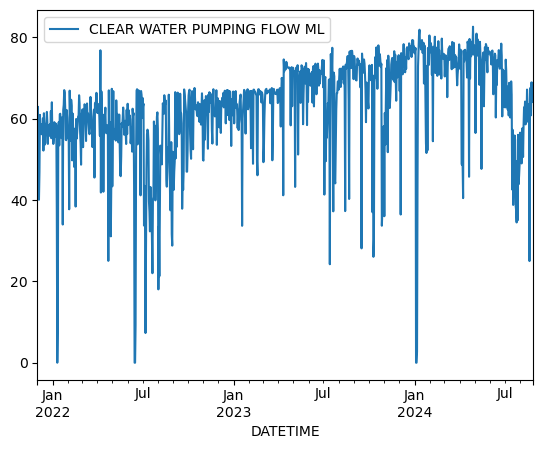

In [11]:
df_daily.plot()

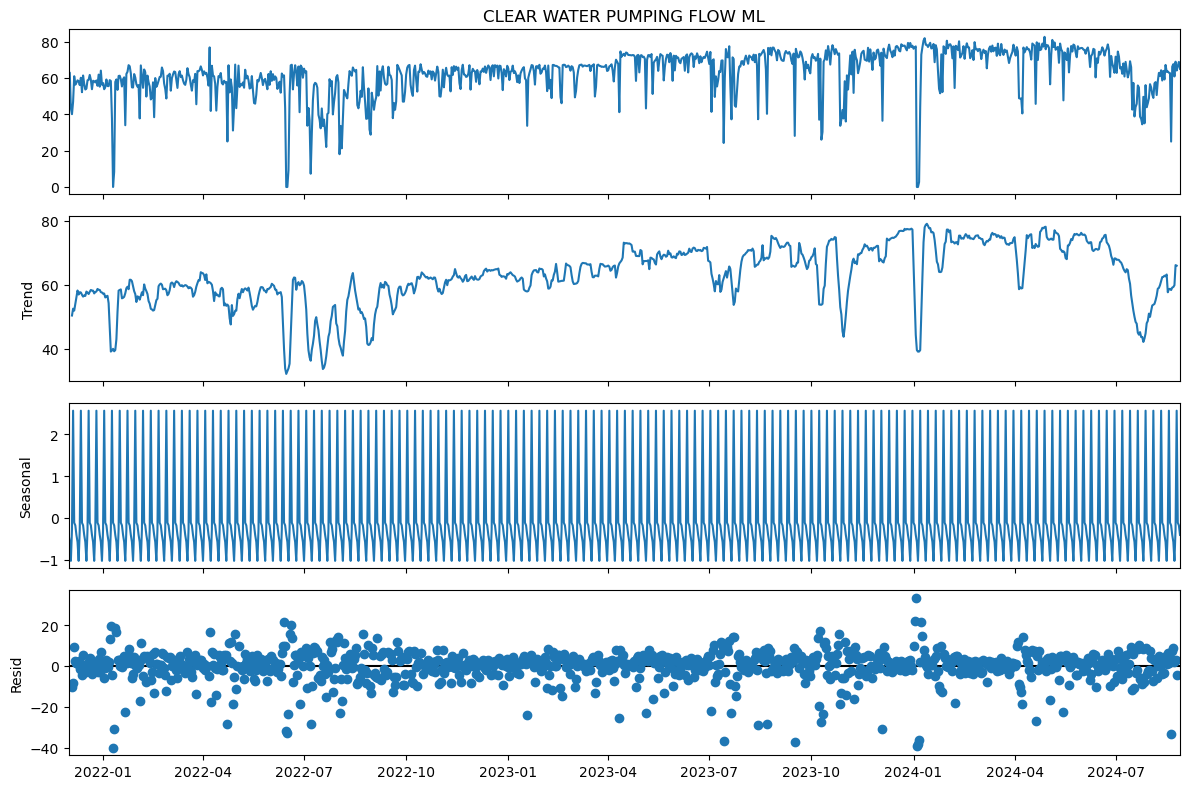

In [12]:
from pylab import rcParams
import matplotlib.pyplot as plt
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8

decomposition = sm.tsa.seasonal_decompose(df_daily['CLEAR WATER PUMPING FLOW ML'], model='additive')


fig = decomposition.plot()

plt.show()

In [27]:
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
class TSA:
    def __init__(self,df):
        self.df = df
        
    def adf_test(self,valcol):
        """
        Pass in a time series and an optional title, returns an ADF report
        """
        result = adfuller(self.df[valcol].dropna(),autolag='AIC') # .dropna() handles differenced data
    
        labels = ['ADF test statistic','p-value','# lags used','# observations']
        out = pd.Series(result[0:4],index=labels)

        for key,val in result[4].items():
            out[f'critical value ({key})']=val
        
        print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
        if result[1] <= 0.05:
            print("Strong evidence against the null hypothesis")
            print("Reject the null hypothesis")
            print("Data has no unit root and is stationary")
            state = "Stationary"
        else:
            print("Weak evidence against the null hypothesis")
            print("Fail to reject the null hypothesis")
            print("Data has a unit root and is non-stationary")
            state = "Non-stationary"
        if state == "Stationary":
            return "Yes"
        else:
            return "No"
    def determine_ARIMA_order(self,valcol):
        stepwise_fit = auto_arima(self.df[valcol],
#                                   start_p=1, start_q=1,max_p=3,max_q=3,trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise
        
        best_order = stepwise_fit.get_params().get('order')
        print('The best order is {}'.format(best_order))
        return best_order
    def fit_model(self,valcol):
        train = self.df[valcol][:len(self.df[valcol])-6]
        test = self.df[valcol][len(self.df[valcol])-6:len(self.df[valcol])-3]
        val = self.df[valcol][len(self.df[valcol])-3:]
        # Assuming 'valcol' is the column name containing the data
#         train = self.df[self.df.index < '2024-06-30'][valcol]
#         val = self.df[(self.df.index >= '2024-06-30') & (self.df.index <= '2024-07-30')][valcol]
#         test = self.df[self.df.index > '2024-07-30'][valcol]

        start = len(train)
        end = len(train)+len(test)-1
        print('start : {}'.format(start))
        print('end : {}'.format(end))

        results = ARIMA(train,order=c1.determine_ARIMA_order(valcol)).fit()
#         results = ARIMA(train,order=(2,1,1)).fit()
        predictions = results.predict(start=start, end=end)
        predictions_test = results.predict(start=start, end=end).round(2)
        print("predictions_test",predictions_test)
        predictions_val = results.predict(start=end+1, end=len(train)+len(test)+len(val)-1).round(2)

        error1 = mean_squared_error(test, predictions)
        error2 = rmse(test, predictions)
        error3 = mean_absolute_percentage_error(test,predictions)
        accuracy = (1-error3)*100
        print(f'MSE Error: {error1:11.10}')
        print(f'RMSE Error: {error2:11.10}')
        print(f'MAPE Error: {error3:11.10}')
        print(f'Accuracy: {accuracy:11.10}')
        
        return predictions_val
        
            
    def full_data_model(self,valcol):
        results = ARIMA(self.df[valcol],order=c1.determine_ARIMA_order(valcol)).fit()
        fcast = results.predict(len(self.df), len(self.df)+3).round(2)
        print(results.summary())
        
        print(fcast)
        DF = pd.DataFrame(self.df[valcol])
        DF['Type'] = 'Actual'
        DF_fcast = pd.DataFrame(fcast)
        DF_fcast['Type'] = 'Predicted'
        DF_fcast = DF_fcast.rename(columns={'predicted_mean':valcol})
        final_DF = pd.concat([DF,DF_fcast])
        final_DF = final_DF.reset_index()

        DF_val = pd.DataFrame(c1.fit_model(valcol))
        DF_val = DF_val.reset_index()
        DF_val = DF_val.rename(columns={'index':'Date','predicted_mean':'Validation'})
        final_DF = final_DF.rename(columns={'index':'Date'})
        print(DF_val)
        print(final_DF)
        final_DF =  final_DF.merge(DF_val, on='Date',how='outer')
        final_DF['Date'] = final_DF['Date'].astype('str')
        print(final_DF)
        print(final_DF.tail(60))
        
c1 = TSA(df_daily)
c1.adf_test("CLEAR WATER PUMPING FLOW ML")
c1.determine_ARIMA_order("CLEAR WATER PUMPING FLOW ML")
c1.fit_model('CLEAR WATER PUMPING FLOW ML')
c1.full_data_model('CLEAR WATER PUMPING FLOW ML')

ADF test statistic       -2.809849
p-value                   0.056881
# lags used              20.000000
# observations          981.000000
critical value (1%)      -3.437033
critical value (5%)      -2.864491
critical value (10%)     -2.568341
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
The best order is (2, 1, 1)
start : 996
end : 998
The best order is (2, 1, 1)
predictions_test 2024-08-23    63.35
2024-08-24    61.69
2024-08-25    60.64
Freq: D, Name: predicted_mean, dtype: float64
MSE Error: 23.47261175
RMSE Error: 4.844854152
MAPE Error: 0.06671042531
Accuracy: 93.32895747
The best order is (2, 1, 1)
                                    SARIMAX Results                                    
Dep. Variable:     CLEAR WATER PUMPING FLOW ML   No. Observations:                 1002
Model:                          ARIMA(2, 1, 1)   Log Likelihood               -3642.148
Date:                         Mon, 14 Oct 2024 

In [21]:
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse

class TSA:
    def __init__(self, df):
        self.df = df

    def prepare_data_for_prophet(self, valcol):
        # Prepare the dataframe in the format required for Prophet: 'ds' for date and 'y' for values
        df_prophet = self.df[[valcol]].reset_index()
        df_prophet.columns = ['ds', 'y']
        return df_prophet

    def fit_prophet(self, valcol):
        # Prepare data
        df_prophet = self.prepare_data_for_prophet(valcol)

        # Split data into train, validation, and test
        train = df_prophet.iloc[:-6]
        test = df_prophet.iloc[-6:-3]
        val = df_prophet.iloc[-3:]

        # Fit the model
        model = Prophet()
        model.fit(train)

        # Create future dataframe for predictions
        future = model.make_future_dataframe(periods=6)

        # Forecast
        forecast = model.predict(future)
        forecast_test = forecast.iloc[-6:-3]['yhat'].round(2)
        forecast_val = forecast.iloc[-3:]['yhat'].round(2)

        # Calculate errors
        error1 = mean_squared_error(test['y'], forecast_test)
        error2 = rmse(test['y'], forecast_test)
        error3 = mean_absolute_percentage_error(test['y'], forecast_test)
        accuracy = (1 - error3) * 100

        print(f'MSE Error: {error1:11.10}')
        print(f'RMSE Error: {error2:11.10}')
        print(f'MAPE Error: {error3:11.10}')
        print(f'Accuracy: {accuracy:11.10}')

        return forecast_val

    def full_data_prophet(self, valcol):
        df_prophet = self.prepare_data_for_prophet(valcol)

        # Fit the model to the full dataset
        model = Prophet()
        model.fit(df_prophet)

        # Forecast the next 4 periods
        future = model.make_future_dataframe(periods=4)
        forecast = model.predict(future)
        forecast = forecast[['ds', 'yhat']].tail(4).round(2)

        # Print summary and forecast
        print(forecast)

        # Create a DataFrame for the actual and predicted data
        DF = pd.DataFrame(self.df[valcol])
        DF['Type'] = 'Actual'
        forecast['Type'] = 'Predicted'
        forecast = forecast.rename(columns={'yhat': valcol})
        final_DF = pd.concat([DF, forecast.set_index('ds')])
        final_DF = final_DF.reset_index()

        # Add validation data
        DF_val = pd.DataFrame(self.fit_prophet(valcol))
        DF_val = DF_val.reset_index()
        
        # Ensure both 'Date' columns are of datetime type before merging
        DF_val = DF_val.rename(columns={'index': 'Date', 'yhat': 'Validation'})
        DF_val['Date'] = pd.to_datetime(DF_val['Date'])  # Convert to datetime if not already
        
        final_DF = final_DF.rename(columns={'index': 'Date'})
        final_DF['Date'] = pd.to_datetime(final_DF['Date'])  # Convert 'Date' to datetime

        # Merge on 'Date' after ensuring both columns are of datetime type
        final_DF = final_DF.merge(DF_val, on='Date', how='outer')
        final_DF['Date'] = final_DF['Date'].astype('str')  # Convert Date to string if needed for final output

        print(final_DF)
        print(final_DF.tail(60))


In [22]:
# Assuming df_daily is your dataframe and 'CLEAR WATER PUMPING FLOW ML' is the target column
c1 = TSA(df_daily)
c1.fit_prophet('CLEAR WATER PUMPING FLOW ML')
c1.full_data_prophet('CLEAR WATER PUMPING FLOW ML')


10:10:01 - cmdstanpy - INFO - Chain [1] start processing
10:10:01 - cmdstanpy - INFO - Chain [1] done processing
10:10:01 - cmdstanpy - INFO - Chain [1] start processing
10:10:01 - cmdstanpy - INFO - Chain [1] done processing


MSE Error: 14.84344035
RMSE Error: 3.852718566
MAPE Error: 0.05971570782
Accuracy: 94.02842922


10:10:02 - cmdstanpy - INFO - Chain [1] start processing


             ds   yhat
1002 2024-08-29  65.47
1003 2024-08-30  64.99
1004 2024-08-31  65.91
1005 2024-09-01  68.89


10:10:02 - cmdstanpy - INFO - Chain [1] done processing


MSE Error: 14.84344035
RMSE Error: 3.852718566
MAPE Error: 0.05971570782
Accuracy: 94.02842922
                               Date  CLEAR WATER PUMPING FLOW ML       Type  \
0     2021-12-01 00:00:00.000000000                     42.40192     Actual   
1     2021-12-02 00:00:00.000000000                     62.91389     Actual   
2     2021-12-03 00:00:00.000000000                     43.41464     Actual   
3     2021-12-04 00:00:00.000000000                     40.06170     Actual   
4     2021-12-05 00:00:00.000000000                     46.87842     Actual   
...                             ...                          ...        ...   
1004  2024-08-31 00:00:00.000000000                     65.91000  Predicted   
1005  2024-09-01 00:00:00.000000000                     68.89000  Predicted   
1006  1970-01-01 00:00:00.000000999                          NaN        NaN   
1007  1970-01-01 00:00:00.000001000                          NaN        NaN   
1008  1970-01-01 00:00:00.000001001 

Weekly Resampling

In [14]:
df_weekly = df_daily.resample('W')['CLEAR WATER PUMPING FLOW ML'].sum()
df_weekly= df_weekly.reset_index()
df_weekly= df_weekly.set_index('DATETIME')
df_weekly

,CLEAR WATER PUMPING FLOW ML
DATETIME,
2021-12-05,235.670570
2021-12-12,407.530700
2021-12-19,395.666220
2021-12-26,407.155871
2022-01-02,403.914700
...,...
2024-08-04,349.983163
2024-08-11,411.578760
2024-08-18,438.489910


<Axes: xlabel='DATETIME'>

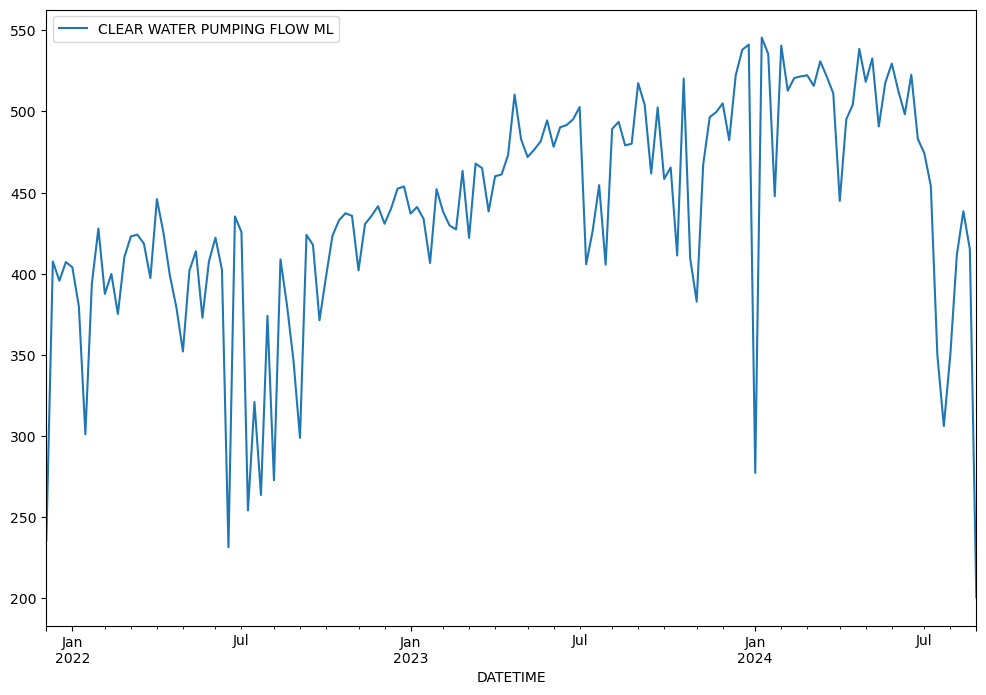

In [15]:
df_weekly.plot()

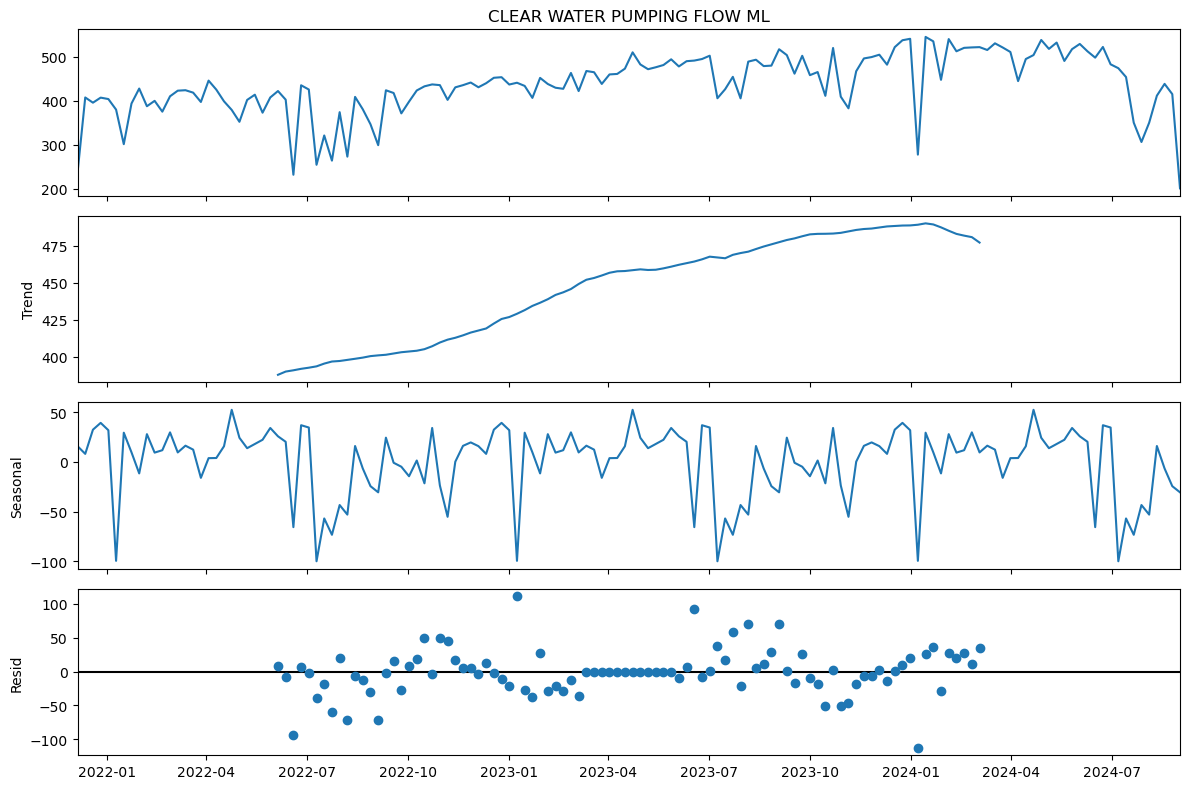

In [16]:
from pylab import rcParams
import matplotlib.pyplot as plt
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8

decomposition = sm.tsa.seasonal_decompose(df_weekly['CLEAR WATER PUMPING FLOW ML'], model='additive')


fig = decomposition.plot()

plt.show()

In [32]:
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
class TSA:
    def __init__(self,df):
        self.df = df
        
    def adf_test(self,valcol):
        """
        Pass in a time series and an optional title, returns an ADF report
        """
        result = adfuller(self.df[valcol].dropna(),autolag='AIC') # .dropna() handles differenced data
    
        labels = ['ADF test statistic','p-value','# lags used','# observations']
        out = pd.Series(result[0:4],index=labels)

        for key,val in result[4].items():
            out[f'critical value ({key})']=val
        
        print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
        if result[1] <= 0.05:
            print("Strong evidence against the null hypothesis")
            print("Reject the null hypothesis")
            print("Data has no unit root and is stationary")
            state = "Stationary"
        else:
            print("Weak evidence against the null hypothesis")
            print("Fail to reject the null hypothesis")
            print("Data has a unit root and is non-stationary")
            state = "Non-stationary"
        if state == "Stationary":
            return "Yes"
        else:
            return "No"
    def determine_ARIMA_order(self,valcol):
        stepwise_fit = auto_arima(self.df[valcol],
#                                   start_p=1, start_q=1,max_p=3,max_q=3,trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise      
        best_order = stepwise_fit.get_params().get('order')
        print('The best order is {}'.format(best_order))
        return best_order
    def fit_model(self,valcol):
        train = self.df[valcol][:len(self.df[valcol])-8]
        test = self.df[valcol][len(self.df[valcol])-8:len(self.df[valcol])-4]
        val = self.df[valcol][len(self.df[valcol])-4:]
        # Assuming 'valcol' is the column name containing the data
#         train = self.df[self.df.index < '2024-06-30'][valcol]
#         val = self.df[(self.df.index >= '2024-06-30') & (self.df.index <= '2024-07-30')][valcol]
#         test = self.df[self.df.index > '2024-07-30'][valcol]
        start = len(train)
        end = len(train)+len(test)-1
        print('start : {}'.format(start))
        print('end : {}'.format(end))
        results = ARIMA(train,order=c1.determine_ARIMA_order(valcol),trend='t').fit()
#         results = ARIMA(train,order=c1.determine_ARIMA_order(valcol)).fit()
        predictions = results.predict(start=start, end=end)
        predictions_test = results.predict(start=start, end=end).round(2)
        predictions_val = results.predict(start=end+1, end=len(train)+len(test)+len(val)-1).round(2)
        
        error1 = mean_squared_error(test, predictions)
        error2 = rmse(test, predictions)
        error3 = mean_absolute_percentage_error(test,predictions)
        accuracy = (1-error3)*100
        print(f'MSE Error: {error1:11.10}')
        print(f'RMSE Error: {error2:11.10}')
        print(f'MAPE Error: {error3:11.10}')
        print(f'Accuracy: {accuracy:11.10}')

        return predictions_val
        
            
    def full_data_model(self,valcol):
        results = ARIMA(self.df[valcol],order=c1.determine_ARIMA_order(valcol),trend='t').fit()
        fcast = results.predict(len(self.df), len(self.df)+3).round(2)
        print(fcast)
        DF = pd.DataFrame(self.df[valcol])
        DF['Type'] = 'Actual'
        DF_fcast = pd.DataFrame(fcast)
        DF_fcast['Type'] = 'Predicted'
        DF_fcast = DF_fcast.rename(columns={'predicted_mean':valcol})
        final_DF = pd.concat([DF,DF_fcast])
        final_DF = final_DF.reset_index()

        DF_val = pd.DataFrame(c1.fit_model(valcol))
        DF_val = DF_val.reset_index()
        DF_val = DF_val.rename(columns={'index':'Date','predicted_mean':'Validation'})
        final_DF = final_DF.rename(columns={'index':'Date'})
        print(DF_val)
        print(final_DF)
        final_DF =  final_DF.merge(DF_val, on='Date',how='outer')
        final_DF['Date'] = final_DF['Date'].astype('str')
        print(final_DF)
        print(final_DF.tail(50))
        
c1 = TSA(df_weekly)
c1.adf_test("CLEAR WATER PUMPING FLOW ML")
c1.determine_ARIMA_order("CLEAR WATER PUMPING FLOW ML")
c1.fit_model('CLEAR WATER PUMPING FLOW ML')
c1.full_data_model('CLEAR WATER PUMPING FLOW ML')

ADF test statistic       -1.919824
p-value                   0.322794
# lags used               3.000000
# observations          140.000000
critical value (1%)      -3.477945
critical value (5%)      -2.882416
critical value (10%)     -2.577902
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
The best order is (0, 1, 1)
start : 136
end : 139
The best order is (0, 1, 1)
MSE Error: 24197.46408
RMSE Error: 155.5553409
MAPE Error: 0.4274051095
Accuracy: 57.25948905


/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


The best order is (0, 1, 1)
2024-09-08    349.24
2024-09-15    349.24
2024-09-22    349.24
2024-09-29    349.24
Freq: W-SUN, Name: predicted_mean, dtype: float64
start : 136
end : 139


/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


The best order is (0, 1, 1)
MSE Error: 24197.46408
RMSE Error: 155.5553409
MAPE Error: 0.4274051095
Accuracy: 57.25948905
        Date  Validation
0 2024-08-11      513.13
1 2024-08-18      514.20
2 2024-08-25      515.28
3 2024-09-01      516.36
          Date  CLEAR WATER PUMPING FLOW ML       Type
0   2021-12-05                   235.670570     Actual
1   2021-12-12                   407.530700     Actual
2   2021-12-19                   395.666220     Actual
3   2021-12-26                   407.155871     Actual
4   2022-01-02                   403.914700     Actual
..         ...                          ...        ...
143 2024-09-01                   200.408450     Actual
144 2024-09-08                   349.240000  Predicted
145 2024-09-15                   349.240000  Predicted
146 2024-09-22                   349.240000  Predicted
147 2024-09-29                   349.240000  Predicted

[148 rows x 3 columns]
           Date  CLEAR WATER PUMPING FLOW ML       Type  Validation
0

/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


Monthly Resampling

In [11]:
df_monthly = df.resample('M')['CLEAR WATER PUMPING FLOW ML'].sum()
df_monthly= df_monthly.reset_index()
df_monthly= df_monthly.set_index('DATETIME')
df_monthly

,CLEAR WATER PUMPING FLOW ML
DATETIME,
2021-12-31,1738.985111
2022-01-31,1669.968356
2022-02-28,1577.522110
2022-03-31,1860.290835
2022-04-30,1699.233060
2022-05-31,1757.840880
2022-06-30,1606.903240
2022-07-31,1404.362230
2022-08-31,1520.865680


<Axes: xlabel='DATETIME'>

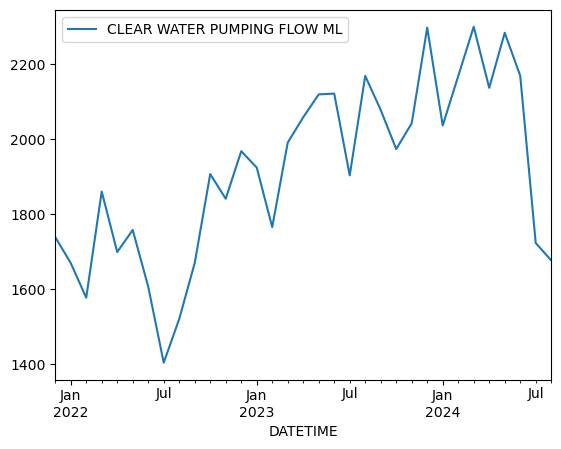

In [12]:
df_monthly.plot()

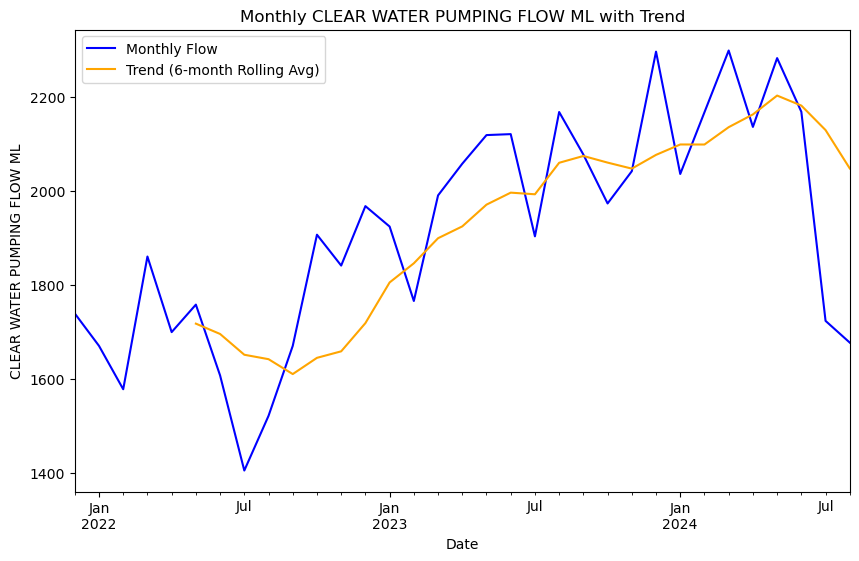

In [16]:
import matplotlib.pyplot as plt

# Calculate and plot the trend using a rolling average (e.g., 6 months)
df_monthly['Trend'] = df_monthly['CLEAR WATER PUMPING FLOW ML'].rolling(window=6).mean()

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the original data with a specified color (e.g., blue)
df_monthly['CLEAR WATER PUMPING FLOW ML'].plot(ax=ax, label='Monthly Flow', color='blue')

# Plot the trend line with a different color (e.g., orange)
df_monthly['Trend'].plot(ax=ax, label='Trend (6-month Rolling Avg)', color='orange')

# Add labels, title, and legend
plt.title('Monthly CLEAR WATER PUMPING FLOW ML with Trend')
plt.xlabel('Date')
plt.ylabel('CLEAR WATER PUMPING FLOW ML')
plt.legend()

# Show the plot
plt.show()


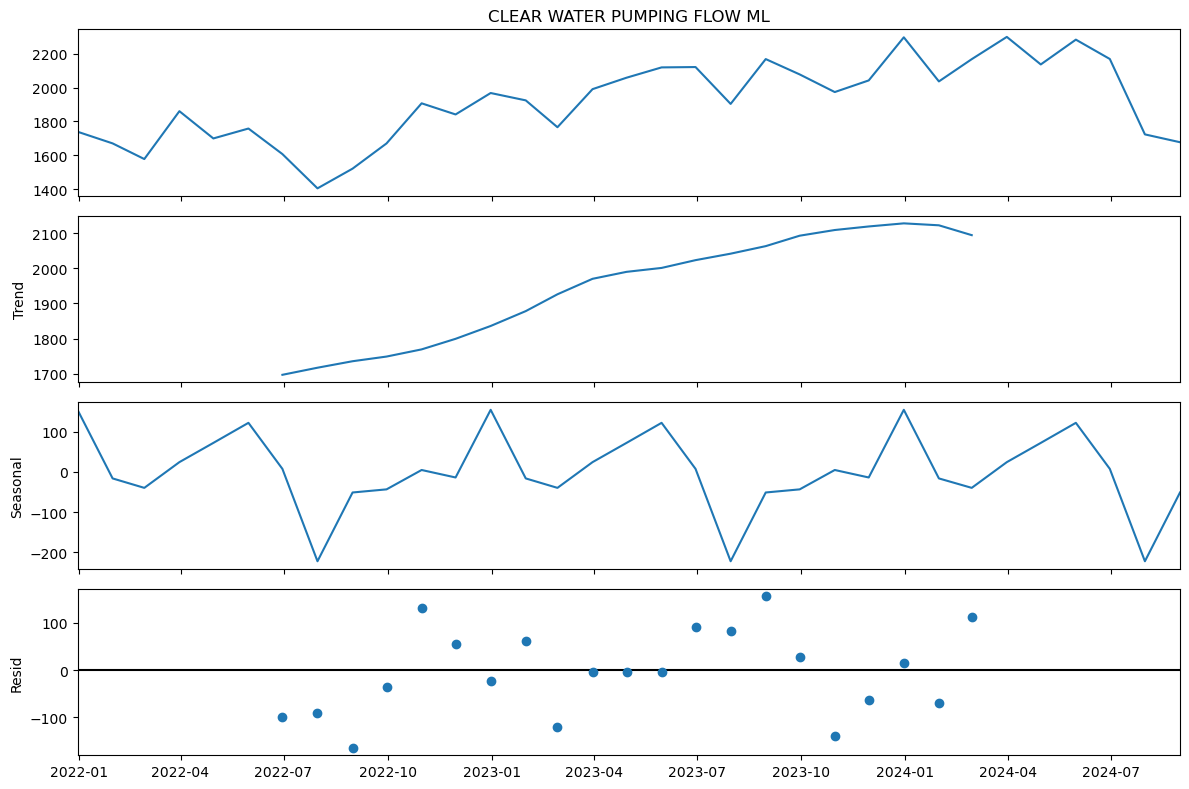

In [21]:
from pylab import rcParams
import matplotlib.pyplot as plt
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8

decomposition = sm.tsa.seasonal_decompose(df_monthly['CLEAR WATER PUMPING FLOW ML'], model='additive')


fig = decomposition.plot()

plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
class TSA:
    def __init__(self,df):
        self.df = df
        
    def adf_test(self,valcol):
        """
        Pass in a time series and an optional title, returns an ADF report
        """
        result = adfuller(self.df[valcol].dropna(),autolag='AIC') # .dropna() handles differenced data
    
        labels = ['ADF test statistic','p-value','# lags used','# observations']
        out = pd.Series(result[0:4],index=labels)

        for key,val in result[4].items():
            out[f'critical value ({key})']=val
        
        print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
        if result[1] <= 0.05:
            print("Strong evidence against the null hypothesis")
            print("Reject the null hypothesis")
            print("Data has no unit root and is stationary")
            state = "Stationary"
        else:
            print("Weak evidence against the null hypothesis")
            print("Fail to reject the null hypothesis")
            print("Data has a unit root and is non-stationary")
            state = "Non-stationary"
        if state == "Stationary":
            return "Yes"
        else:
            return "No"
    def determine_ARIMA_order(self,valcol):
        stepwise_fit = auto_arima(self.df[valcol],
#                                   start_p=1, start_q=1,max_p=3,max_q=3,trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise
        best_order = stepwise_fit.get_params().get('order')
        print('The best order is {}'.format(best_order))
        return best_order
    def fit_model(self,valcol):
        train = self.df[valcol][:len(self.df[valcol])-8]
        test = self.df[valcol][len(self.df[valcol])-8:len(self.df[valcol])-4]
        val = self.df[valcol][len(self.df[valcol])-4:]
        # Assuming 'valcol' is the column name containing the data
#         train = self.df[self.df.index < '2024-06-30'][valcol]
#         val = self.df[(self.df.index >= '2024-06-30') & (self.df.index <= '2024-07-30')][valcol]
#         test = self.df[self.df.index > '2024-07-30'][valcol]
        start = len(train)
        end = len(train)+len(test)-1
        print('start : {}'.format(start))
        print('end : {}'.format(end))
#         results = ARIMA(train,order=c1.determine_ARIMA_order(valcol)).fit()
        results = ARIMA(train,order=c1.determine_ARIMA_order(valcol),trend='t').fit()
        predictions = results.predict(start=start, end=end)
        predictions_test = results.predict(start=start, end=end).round(2)
        predictions_val = results.predict(start=end+1, end=len(train)+len(test)+len(val)-1).round(2)

        error1 = mean_squared_error(test, predictions)
        error2 = rmse(test, predictions)
        error3 = mean_absolute_percentage_error(test,predictions)
        accuracy = (1-error3)*100
        print(f'MSE Error: {error1:11.10}')
        print(f'RMSE Error: {error2:11.10}')
        print(f'MAPE Error: {error3:11.10}')
        print(f'Accuracy: {accuracy:11.10}')
        
        return predictions_val
        
            
    def full_data_model(self,valcol):
        results = ARIMA(self.df[valcol],order=c1.determine_ARIMA_order(valcol),trend='t').fit()
#         if len(self.df[valcol]) > 70:
        fcast = results.predict(len(self.df), len(self.df)+3).round(2)
        
#         else:
#             fcast = results.predict(len(self.df), len(self.df)+3,typ='levels').round(2)
#         ax = self.df[valcol].plot(legend=True,figsize=(12,6))
#         fcast.plot(legend=True)
        print(fcast)
        DF = pd.DataFrame(self.df[valcol])
        DF['Type'] = 'Actual'
       
        
#         DF = DF.reset_index()
        DF_fcast = pd.DataFrame(fcast)
        DF_fcast['Type'] = 'Predicted'
        DF_fcast = DF_fcast.rename(columns={'predicted_mean':valcol})
        final_DF = pd.concat([DF,DF_fcast])
        final_DF = final_DF.reset_index()
#         DF_fcast = DF_fcast.rename(columns={'predicted_mean':'Predicted', 'index':'DateTime'})
        DF_val = pd.DataFrame(c1.fit_model(valcol))
        DF_val = DF_val.reset_index()
        DF_val = DF_val.rename(columns={'index':'Date','predicted_mean':'Validation'})
        final_DF = final_DF.rename(columns={'index':'Date'})
        print(DF_val)
        print(final_DF)
#         final_DF =  final_DF.merge(DF_val, on='DateTime',how='outer')
        final_DF =  final_DF.merge(DF_val, on='Date',how='outer')
        final_DF['Date'] = final_DF['Date'].astype('str')
        print(final_DF)
        print(final_DF.tail(50))
        
c1 = TSA(df_monthly)
c1.adf_test("CLEAR WATER PUMPING FLOW ML")
c1.determine_ARIMA_order("CLEAR WATER PUMPING FLOW ML")
c1.fit_model('CLEAR WATER PUMPING FLOW ML')
c1.full_data_model('CLEAR WATER PUMPING FLOW ML')

ADF test statistic      -2.102548
p-value                  0.243491
# lags used              0.000000
# observations          32.000000
critical value (1%)     -3.653520
critical value (5%)     -2.957219
critical value (10%)    -2.617588
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
The best order is (0, 1, 0)
start : 25
end : 28
The best order is (0, 1, 0)
MSE Error: 45039.86421
RMSE Error: 212.2259744
MAPE Error: 0.09208135609
Accuracy: 90.79186439


/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


The best order is (0, 1, 0)
2024-09-30    1674.94
2024-10-31    1673.00
2024-11-30    1671.06
2024-12-31    1669.11
Freq: M, Name: predicted_mean, dtype: float64
start : 25
end : 28


/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


The best order is (0, 1, 0)
MSE Error: 45039.86421
RMSE Error: 212.2259744
MAPE Error: 0.09208135609
Accuracy: 90.79186439
        Date  Validation
0 2024-05-31     2413.04
1 2024-06-30     2436.28
2 2024-07-31     2459.53
3 2024-08-31     2482.77
         Date  CLEAR WATER PUMPING FLOW ML       Type
0  2021-12-31                  1738.985111     Actual
1  2022-01-31                  1669.968356     Actual
2  2022-02-28                  1577.522110     Actual
3  2022-03-31                  1860.290835     Actual
4  2022-04-30                  1699.233060     Actual
5  2022-05-31                  1757.840880     Actual
6  2022-06-30                  1606.903240     Actual
7  2022-07-31                  1404.362230     Actual
8  2022-08-31                  1520.865680     Actual
9  2022-09-30                  1669.906550     Actual
10 2022-10-31                  1906.800580     Actual
11 2022-11-30                  1841.023200     Actual
12 2022-12-31                  1967.663750     Act

/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/shilpa.av/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
